# MATH 441 Discrete Optimization Problems

## October 6, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.optimize import linprog

## Optimal Transport

### Balance Equations

Write a function called `balanceOT` which takes `ns` and `nt` and returns the balance equations matrix $A$ of size $n_s \times n_t$ for optimal transport for $n_s$ source nodes and $n_t$ target nodes.

In [2]:
def balanceOT(ns,nt):
    A = np.zeros((ns + nt,ns*nt))
    for i in range(0,ns):
        A[i,i*nt:(i+1)*nt] = np.ones(nt)
        A[ns:,i*nt:(i+1)*nt] = np.eye(nt)
    return A

In [3]:
balanceOT(3,2)

array([[1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1.],
       [1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1.]])

In [4]:
balanceOT(4,3)

array([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]])

**Question.** How do we do this more efficiently without using a `for` loop?

### Cost Matrix

Represent a node as triple $(x,y,m)$ where $(x,y)$ are the coordinates of the node in 2D and $m$ is the mass. A set of nodes is a matrix with 3 columns. Write a function called `costOT` which takes matrices `S` and `T` (each with 3 columns) and returns the cost matrix $C = [c_{ij}]$ where $c_{ij}$ is the distance from source node $i$ (ie. row $i$ in $S$)to target node $j$ (ie. row $j$ in $T$).

In [5]:
def costOT(S,T):
    ns = S.shape[0]
    nt = T.shape[0]
    C = np.zeros((ns,nt))
    for i in range(0,ns):
        for j in range(0,nt):
            C[i,j] = la.norm(S[i,[0,1]] - T[j,[0,1]])
    return C

In [6]:
S = np.array([[0,0,1/3],[1,0,1/3],[0,1,1/3]])
T = np.array([[2,2,1/3],[2,3,2/3]])
costOT(S,T)

array([[2.82842712, 3.60555128],
       [2.23606798, 3.16227766],
       [2.23606798, 2.82842712]])

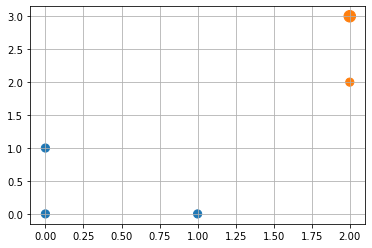

In [7]:
plt.scatter(S[:,0],S[:,1],s=200*S[:,2])
plt.scatter(T[:,0],T[:,1],s=200*T[:,2])
plt.grid(True)
plt.show()

**Question.** How do we do this more efficiently without using nested `for` loops?

### Solving Optimal Transport Problems

In [8]:
S = np.array([[0,0,1/3],[1,0,1/3],[0,1,1/3]])
T = np.array([[2,2,1/2],[2,3,1/2]])
C = costOT(S,T)
A = balanceOT(3,2)
b = np.hstack([S[:,2],T[:,2]])
solution = linprog(C.flatten(),A_eq=A[:-1],b_eq=b[:-1])
X = solution.x.reshape(3,2)
X

array([[1.66666667e-01, 1.66666667e-01],
       [3.33333333e-01, 1.40848674e-12],
       [1.73011872e-12, 3.33333333e-01]])

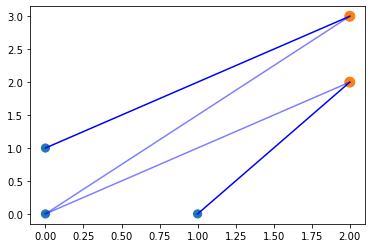

In [9]:
plt.scatter(S[:,0],S[:,1],s=200*S[:,2])
plt.scatter(T[:,0],T[:,1],s=200*T[:,2])
for i in range(0,3):
    for j in range(0,2):
        plt.plot([S[i,0],T[j,0]],[S[i,1],T[j,1]],'b',alpha=X[i,j]/np.max(X))

In [10]:
def solveOT(S,T,ms=200,show=True):
    ns = S.shape[0]
    nt = T.shape[0]
    C = costOT(S,T)
    A = balanceOT(ns,nt)
    b = np.hstack([S[:,2],T[:,2]])
    solution = linprog(C.flatten(),A_eq=A[:-1],b_eq=b[:-1])
    X = solution.x.reshape(ns,nt)
    min_c = np.sum(C*X)
    return X,min_c

def plotOT(S,T,X,ms=200):
    ns = S.shape[0]
    nt = T.shape[0]
    plt.scatter(S[:,0],S[:,1],s=ms*S[:,2])
    plt.scatter(T[:,0],T[:,1],s=ms*T[:,2])
    for i in range(0,ns):
        for j in range(0,nt):
            plt.plot([S[i,0],T[j,0]],[S[i,1],T[j,1]],'b',alpha=X[i,j]/np.max(X))
    plt.show()

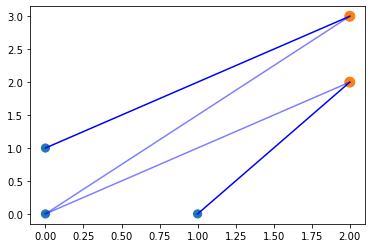

In [11]:
S = np.array([[0,0,1/3],[1,0,1/3],[0,1,1/3]])
T = np.array([[2,2,1/2],[2,3,1/2]])
X,c = solveOT(S,T)
plotOT(S,T,X)

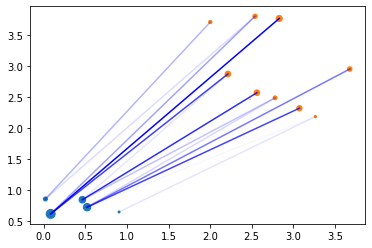

In [12]:
ns = 5; nt = 10;
S = np.random.random((ns,3))
S[:,2] = S[:,2]/np.sum(S[:,2])
T = 2*np.random.random((nt,3))
T[:,[0,1]] = T[:,[0,1]] + 2*np.ones((nt,2))
T[:,2] = T[:,2]/np.sum(T[:,2])
X,c = solveOT(S,T)
plotOT(S,T,X)

## Images

### Digits dataset

In [13]:
from sklearn.datasets import load_digits

In [14]:
data = load_digits()
images = data.images

In [15]:
images.shape

(1797, 8, 8)

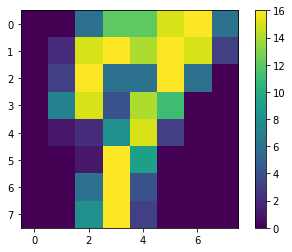

In [16]:
plt.imshow(images[430]), plt.colorbar()
plt.show()

### Images as Nodes with Mass

Write a function called `image2nodes` which takes a matrix `M` of size $m \times n$ and return a matrix `S` of size $nm \times 3$ where entry `M[i,j]` corresponds to row `S[i*n+j,:] = [j,-i,M[i,j]/sum(M)]`. In other words, we take the column index `j` as the $x$ coordinate, -1 times the row index as the $y$ coordinate and the value `M[i,j]/sum(M)` as the mass. The sum of the masses of the nodes is 1.

In [17]:
def image2nodes(M):
    m,n = M.shape
    c0 = np.hstack([np.arange(n) for k in range(0,m)]).reshape(m*n,1)
    c1 = -np.hstack([k*np.ones(m) for k in range(0,n)]).reshape(m*n,1)
    c2 = M.flatten()/np.sum(M)
    S = np.column_stack([c0,c1,c2])
    return S

In [18]:
M = np.array([[1,2],[3,4]])
M

array([[1, 2],
       [3, 4]])

In [19]:
S = image2nodes(M)
S

array([[ 0. , -0. ,  0.1],
       [ 1. , -0. ,  0.2],
       [ 0. , -1. ,  0.3],
       [ 1. , -1. ,  0.4]])

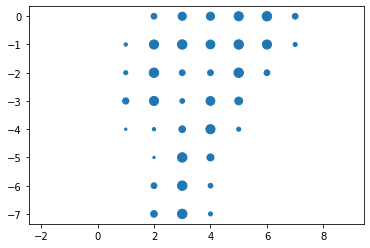

In [20]:
S = image2nodes(images[430])
plt.scatter(S[:,0],S[:,1],s=2000*S[:,2])
plt.axis("equal")
plt.show()

## Optmial Transport of Images

Choose a source image and a target image, transform the images to source nodes and target nodes and compute the optimal transport from source to target.

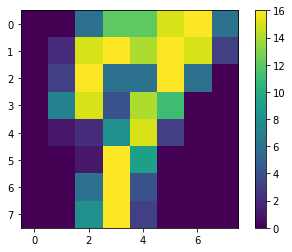

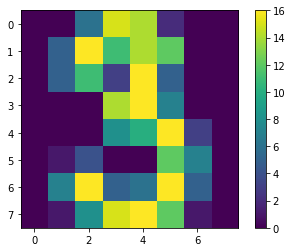

In [21]:
source = images[430]
target = images[431]
plt.imshow(source), plt.colorbar(), plt.show();
plt.imshow(target), plt.colorbar(), plt.show();

In [22]:
S = image2nodes(source)
T = image2nodes(target)
X,c = solveOT(S,T)
c

1.1392374260142828

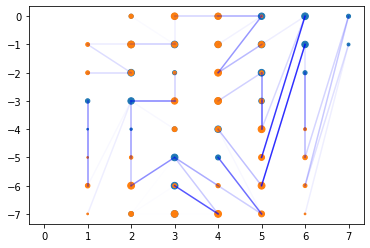

In [23]:
plotOT(S,T,X,ms=1000)

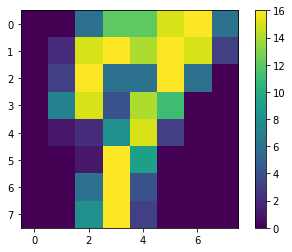

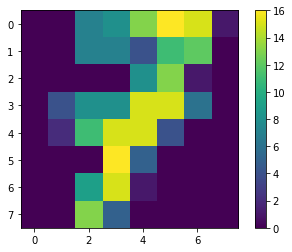

In [24]:
source = images[430]
target = images[7]
plt.imshow(source), plt.colorbar(), plt.show();
plt.imshow(target), plt.colorbar(), plt.show();

In [25]:
S = image2nodes(source)
T = image2nodes(target)
X,c = solveOT(S,T)
c

0.43397844082054343

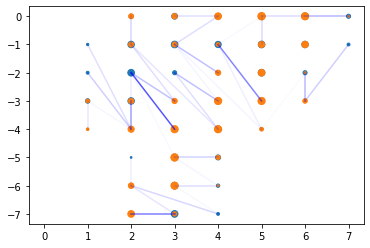

In [26]:
plotOT(S,T,X,ms=1000)

## Image Recognition

Write a function called `classifyDigit` which takes an 8 by 8 pixel image matrix and classifies the digit by the minimum optomal transport value relative to reference images for digits 0 to 9.